In [1]:
# Dependencies
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt
style.use('fivethirtyeight')

import numpy as np
import pandas as pd
import datetime as dt

In [2]:
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///Hawaii.Sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

# Precipitation/Climate Analysis

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Precipitation_Data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()

In [10]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
Data = {'date': [], 'prcp': []}
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
Precip_Data = pd.DataFrame(Precipitation_Data)
#Precip_Data['date'] = pd.to_datetime(Precip_Data['date'])
Precip_Data = Precip_Data.set_index('date')
Precip_Data.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


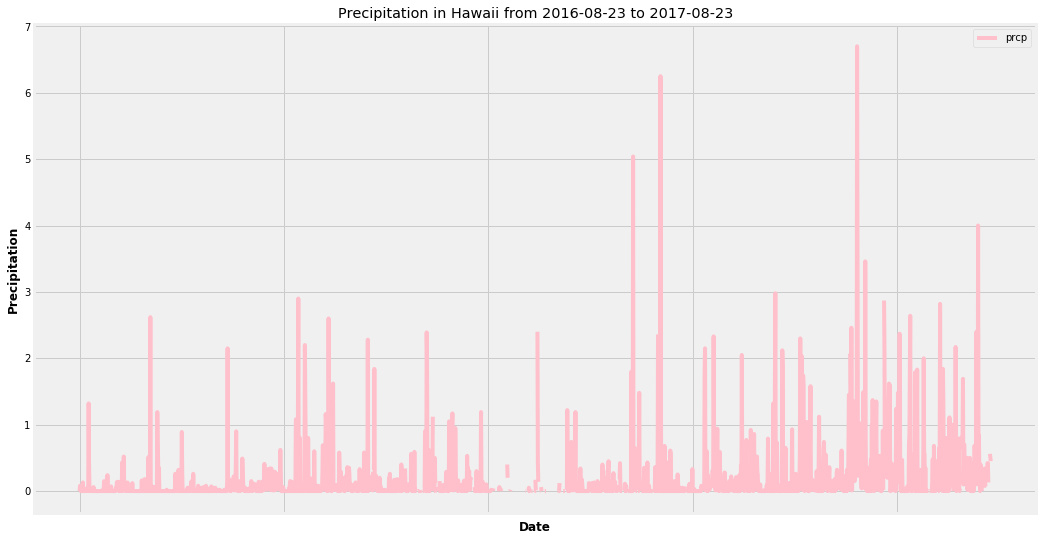

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
Precip_Plot = Precip_Data.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='pink')
plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title("Precipitation in Hawaii from 2016-08-23 to 2017-08-23")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precip_Data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [13]:
# Design a query to show how many stations are available in this dataset?
Number_of_Stations = session.query(Station.id).count()
print("Number of Available Stations = " + str(Number_of_Stations))

Number of Available Stations = 9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Most_Active_Stations = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
Most_Active_Stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [15]:
# Choose the station with the highest number of temperature observations.
Highest_Observation = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
print(Highest_Observation)

('USC00519281', 2772)


In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature for the most active station
#[(54.0, 85.0, 71.66378066378067)]
Lowest_Temperature_Recorded = session.query(func.min(Measurement.tobs)).all()
Highest_Temperature_Recorded = session.query(func.max(Measurement.tobs)).all()
Average_Temperature = session.query(func.avg(Measurement.tobs)).all()

print(Lowest_Temperature_Recorded)
print(Highest_Temperature_Recorded)
print(Average_Temperature)

[(53.0,)]
[(87.0,)]
[(73.09795396419437,)]


In [17]:
# Query the last 12 months of temperature observation data for this station and 
#[temp[0] for temp in Waihee_Tobs]
Temperatures = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2017-01-11').\
    order_by(Measurement.date).all()
Temperatures

[('USC00519397', '2017-01-12', 67.0),
 ('USC00513117', '2017-01-12', 67.0),
 ('USC00517948', '2017-01-12', 67.0),
 ('USC00519523', '2017-01-12', 81.0),
 ('USC00519281', '2017-01-12', 65.0),
 ('USC00516128', '2017-01-12', 68.0),
 ('USC00519397', '2017-01-13', 67.0),
 ('USC00513117', '2017-01-13', 70.0),
 ('USC00514830', '2017-01-13', 75.0),
 ('USC00517948', '2017-01-13', 68.0),
 ('USC00519281', '2017-01-13', 69.0),
 ('USC00516128', '2017-01-13', 67.0),
 ('USC00519397', '2017-01-14', 65.0),
 ('USC00513117', '2017-01-14', 66.0),
 ('USC00514830', '2017-01-14', 77.0),
 ('USC00519281', '2017-01-14', 77.0),
 ('USC00516128', '2017-01-14', 70.0),
 ('USC00519397', '2017-01-15', 66.0),
 ('USC00513117', '2017-01-15', 67.0),
 ('USC00519523', '2017-01-15', 78.0),
 ('USC00519281', '2017-01-15', 70.0),
 ('USC00516128', '2017-01-15', 68.0),
 ('USC00519397', '2017-01-16', 67.0),
 ('USC00513117', '2017-01-16', 69.0),
 ('USC00514830', '2017-01-16', 76.0),
 ('USC00519523', '2017-01-16', 80.0),
 ('USC005192

In [18]:
# Plot the results as a histogram
Results = pd.DataFrame(Temperatures, columns=['Station', 'Date', 'Temperatures'])
Results.set_index('Station', inplace=True)
Results.head()

,Date,Temperatures
Station,,
USC00519397,2017-01-12,67.0
USC00513117,2017-01-12,67.0
USC00517948,2017-01-12,67.0
USC00519523,2017-01-12,81.0
USC00519281,2017-01-12,65.0


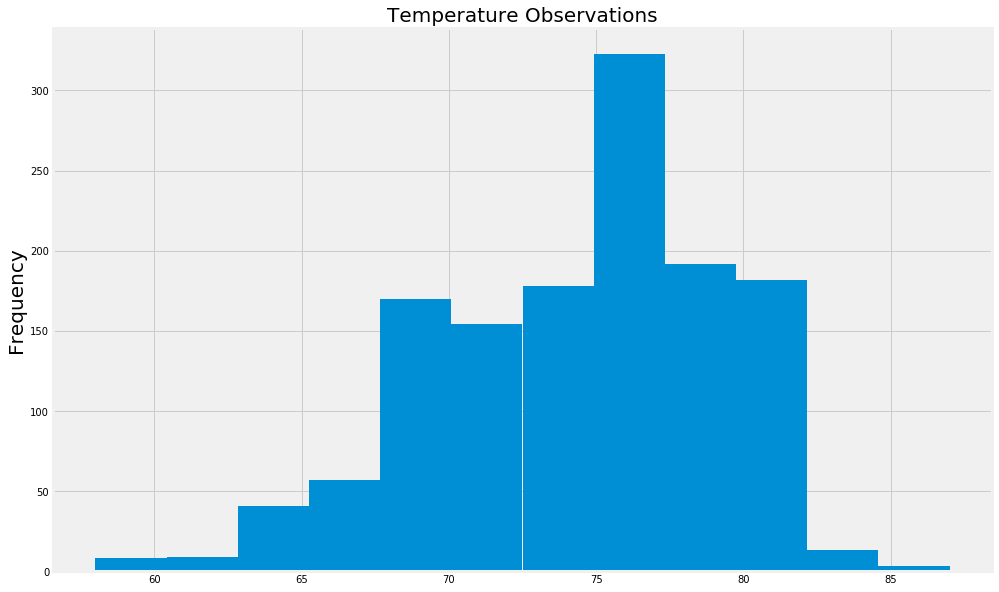

In [19]:
Plot = Results['Temperatures'].hist(bins=12, figsize=(15,10))
Plot.set_title('Temperature Observations', fontsize=20)
Plot.set_ylabel('Frequency', fontsize=20)
plt.show()